### Import Modules & Packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Read Images and Create Label

In [2]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir('flowers'):
    for file in os.listdir(os.path.join('flowers', folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join('flowers', folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

### Conversion to numerical values

In [3]:
data_arr = np.array(data)
label_arr = np.array(label)

### Normalize Data

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

### Train - Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

### Training Neural Networks

In [6]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 224, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 224, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 224, kernel_size = (3,3),padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 112, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 112, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 112, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(224, activation='relu'))
model.add(Dense(112, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

### Creating more Training images (to prevent overfitting)

In [7]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001B759D5F040>>

In [8]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

### Compile

In [9]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=6
history = model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    epochs = epochs,
    validation_data = (X_test,y_test),
    verbose = 1
)

Epoch 1/6
46/46 [==============================] - 109s 2s/step - loss: 1.0407 - accuracy: 0.5195 - val_loss: 0.7008 - val_accuracy: 0.5945
Epoch 2/6
46/46 [==============================] - 66s 1s/step - loss: 0.7735 - accuracy: 0.5241 - val_loss: 0.6286 - val_accuracy: 0.6712
Epoch 3/6
46/46 [==============================] - 66s 1s/step - loss: 0.7140 - accuracy: 0.5661 - val_loss: 0.6527 - val_accuracy: 0.6658
Epoch 4/6
46/46 [==============================] - 67s 1s/step - loss: 0.6927 - accuracy: 0.6193 - val_loss: 0.4885 - val_accuracy: 0.7726
Epoch 5/6
46/46 [==============================] - 67s 1s/step - loss: 0.6252 - accuracy: 0.7003 - val_loss: 0.5146 - val_accuracy: 0.7425
Epoch 6/6
46/46 [==============================] - 67s 1s/step - loss: 0.5358 - accuracy: 0.7692 - val_loss: 0.4374 - val_accuracy: 0.7836


### Outcome

IndexError: index 2 is out of bounds for axis 1 with size 2

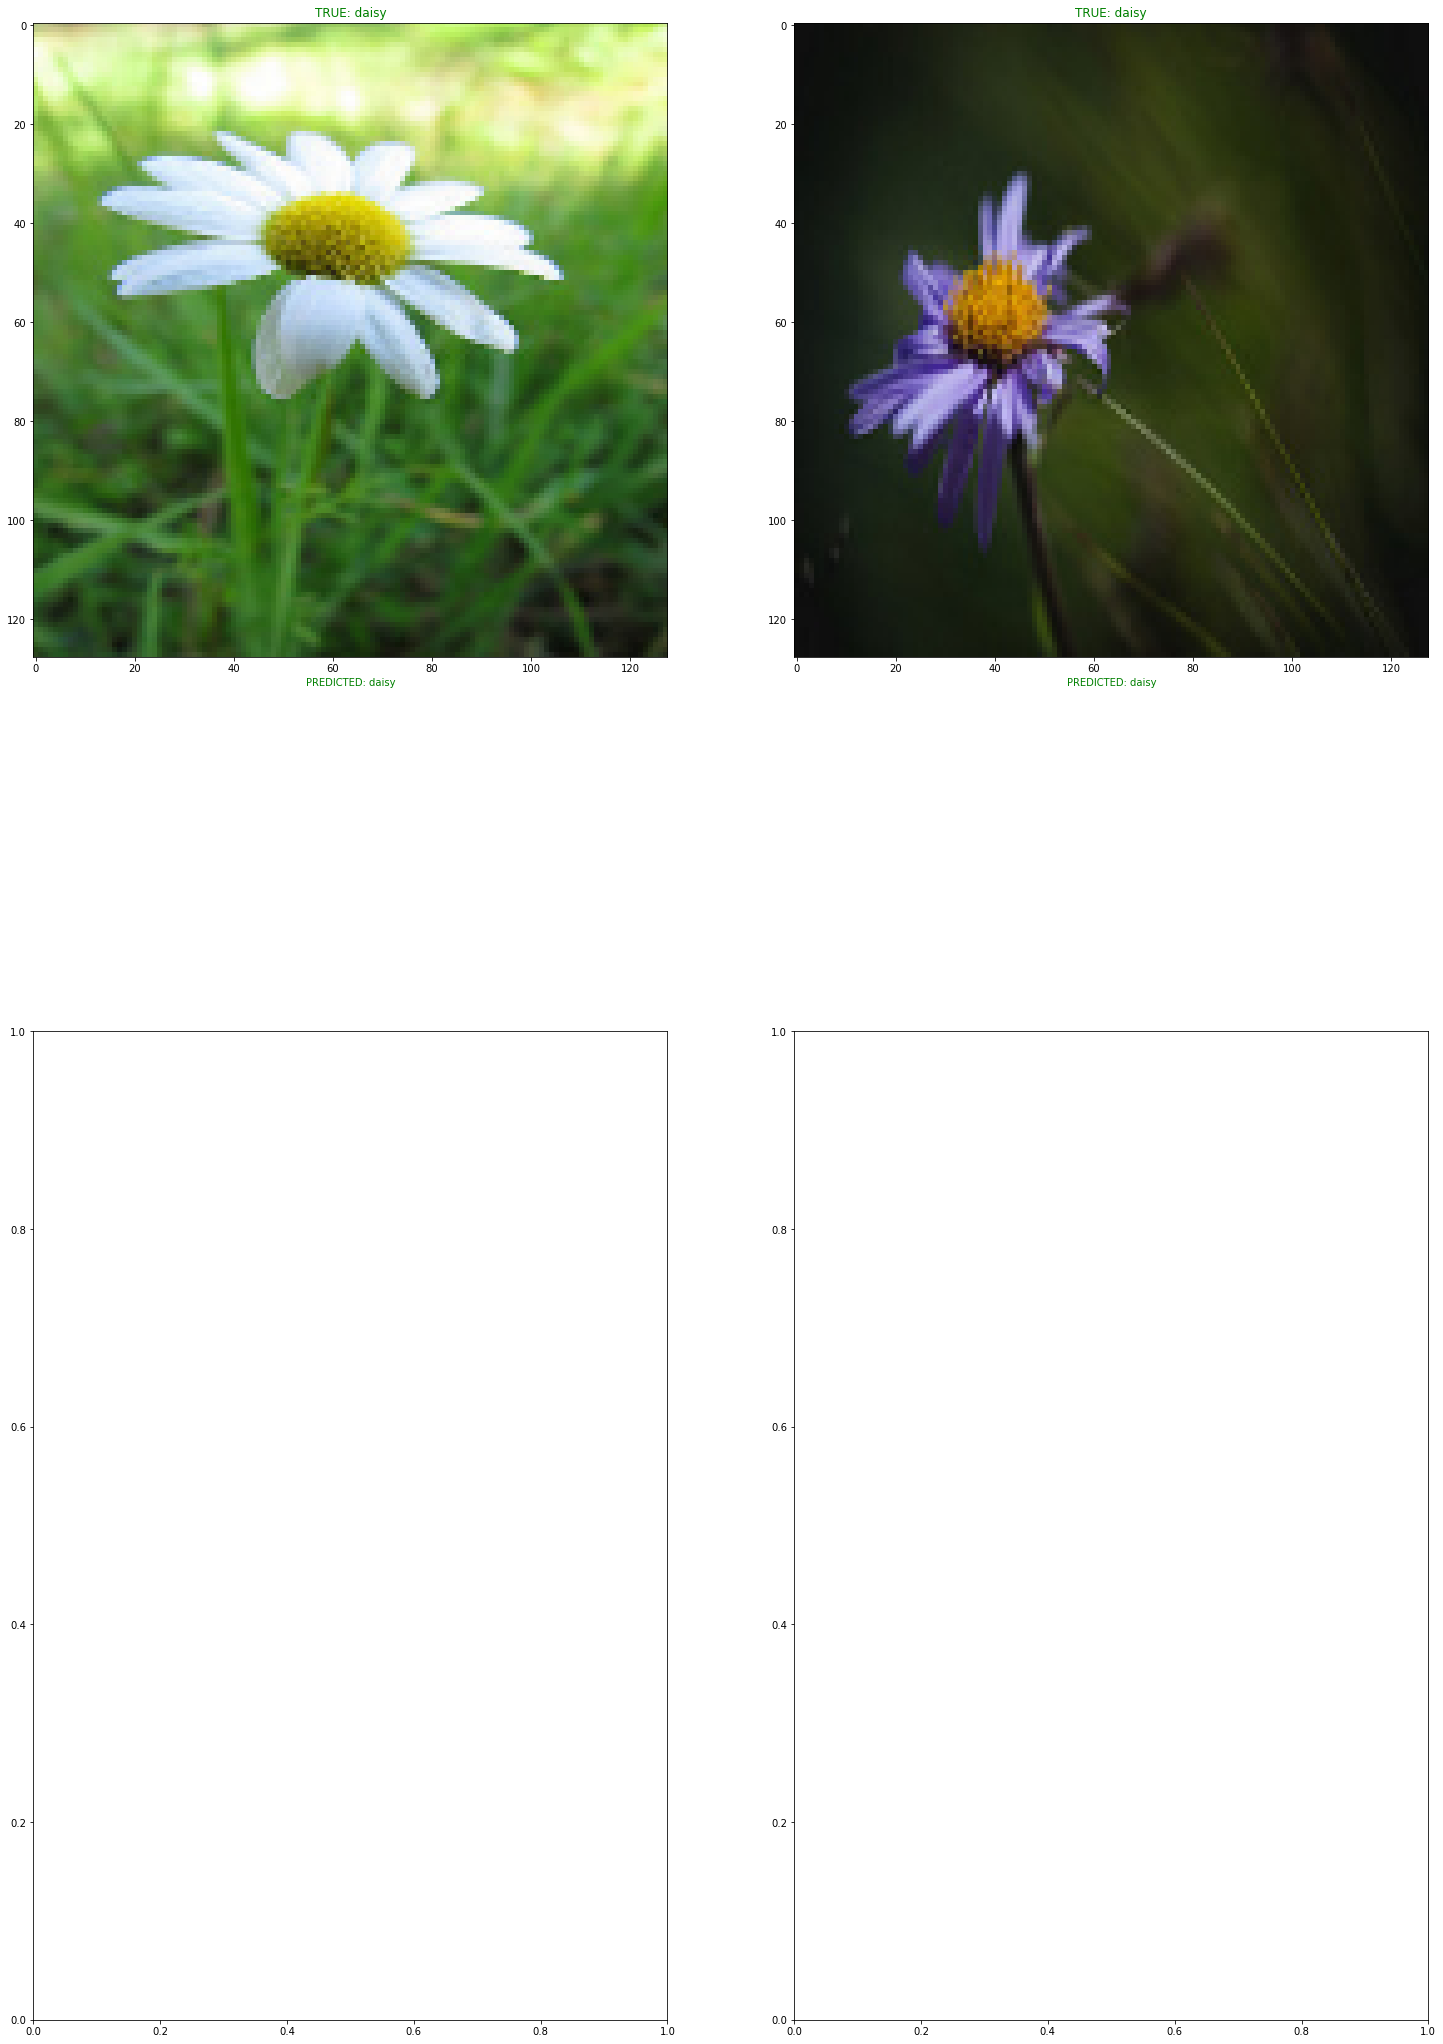

In [10]:
categories = np.sort(os.listdir('flowers'))
fig, ax = plt.subplots(2,2, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [ ]:
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 1)
ax.yaxis.set_tick_params(pad = 1)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.1,
		alpha = 0.1)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()-((i.get_width())/2), i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='red')
x=i.get_width()
print(i.get_width())

# Add Plot Title
ax.set_title('Sports car and their price in crore',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)
